# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [197]:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib.style
import seaborn as sns
from scipy.integrate import quad



## Challenge 1

#### The data we will use in this challenge is:

In [61]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

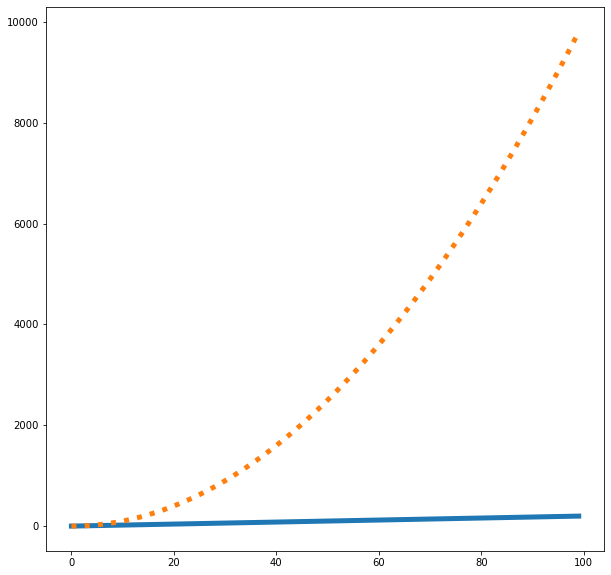

In [51]:
plt.figure(figsize=(10,10))

plt.plot(x,y,z, ':', linewidth=5)
plt.show()


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

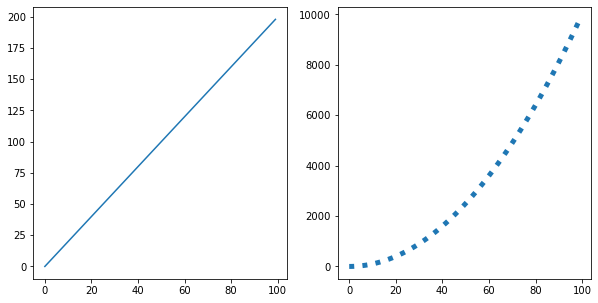

In [62]:
f,(a1,a2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

a1.plot(x, y)
a2.plot(x,z, ':', linewidth=5)


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

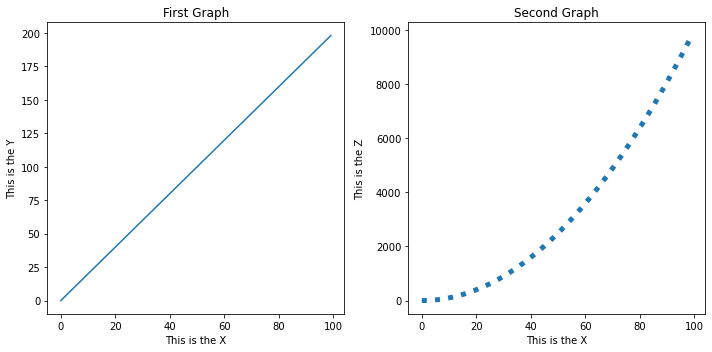

In [84]:
fig,(a1,a2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

a1.plot(x, y)
a2.plot(x,z, ':', linewidth=5)

a1.set_title("First Graph")
a2.set_title("Second Graph")

a1.set_ylabel('This is the Y')
a1.set_xlabel('This is the X')


a2.set_ylabel('This is the Z')
a2.set_xlabel('This is the X')

fig.tight_layout()


#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

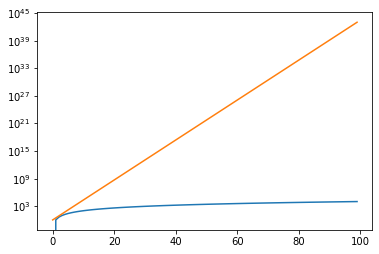

In [94]:
#x = np.arange(0,100)
#z = x**2

plt.plot(x,z, np.exp(x))
#plt.yscale('log')
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

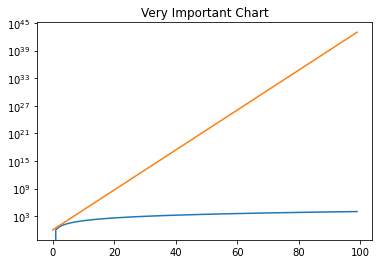

In [98]:
plt.title('Awesome Chart')
plt.plot(x,z,np.exp(x))
plt.yscale('log')
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [104]:
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.tail(20)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
347,2016-04-18,3486,1945,15.06,18,860.000,190,6,98,1926,...,9.357847,Monday,0.0,1,5.116667,91.641791,0.000000,0.000000,April,4
348,2016-04-19,3596,17232,13.61,17,1.002,262,4,88,2085,...,8.456859,Tuesday,1.0,1,0.000000,0.000000,5.116667,91.641791,April,4
349,2016-04-20,3321,16946,12.93,25,762.000,238,5,67,1795,...,8.034327,Wednesday,2.0,1,6.850000,92.986425,0.000000,0.000000,April,4
350,2016-04-21,3464,19183,14.67,24,723.000,218,7,97,1964,...,9.115513,Thursday,3.0,1,5.683333,92.663043,6.850000,92.986425,April,4
351,2016-04-22,3328,12963,9.66,10,404.000,436,14,10,202,...,6.002444,Friday,4.0,1,7.166667,87.398374,5.683333,92.663043,April,4
352,2016-04-23,2612,6456,4.80,6,782.000,305,0,0,1135,...,2.982581,Saturday,5.0,0,5.083333,87.643678,7.166667,87.398374,April,4
353,2016-04-24,2863,10413,7.73,6,700.000,269,28,24,1411,...,4.803198,Sunday,6.0,0,6.250000,87.006961,5.083333,87.643678,April,4
354,2016-04-25,3175,10499,7.80,0,661.000,430,9,4,1805,...,4.846694,Monday,0.0,1,3.950000,89.433962,6.250000,87.006961,April,4
355,2016-04-26,3357,17226,12.97,19,751.000,185,16,95,1798,...,8.059182,Tuesday,1.0,1,6.000000,94.736842,3.950000,89.433962,April,4
356,2016-04-27,3631,19784,15.51,25,694.000,151,26,128,207,...,9.637464,Wednesday,2.0,1,6.016667,88.048780,6.000000,94.736842,April,4


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

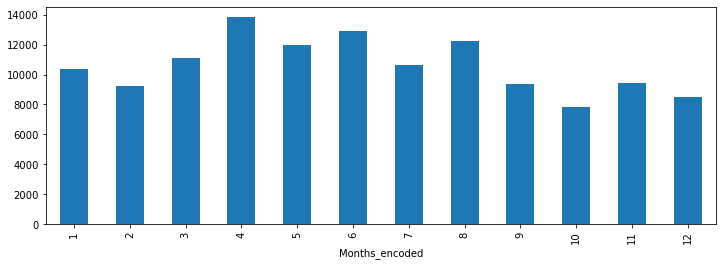

In [231]:
# MEDIAN STEPS BY MONTH_ENCODED
#How the average number of steps change by month


months_steps = fitbit.groupby('Months_encoded')['Steps'].median()
months_steps
months_steps.plot(kind = 'bar', figsize = (12,4))


#plt.savefig('months_steps.png')

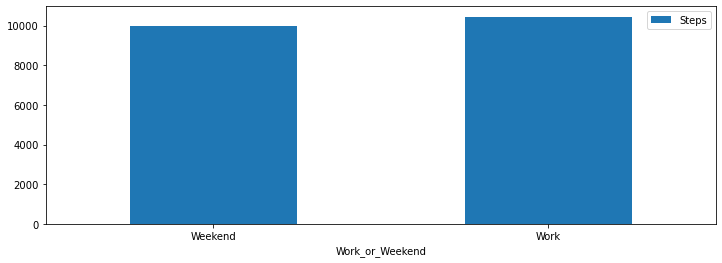

<Figure size 432x288 with 0 Axes>

In [232]:
# MEDIAN STEPS BY WORK_OR_WEEKEND
#Is Fitbitter more active on weekend or workdays? 

df = fitbit.groupby('Work_or_Weekend', as_index=False)['Steps'].median()
df['Work_or_Weekend'] = df['Work_or_Weekend'].replace([0,1],['Weekend','Work'])
df.plot(kind = 'bar',x='Work_or_Weekend',y='Steps', figsize = (12,4))

plt.xticks(rotation='horizontal')
plt.show()
#plt.savefig('work_weekend_steps.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

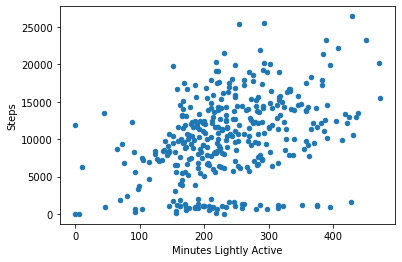

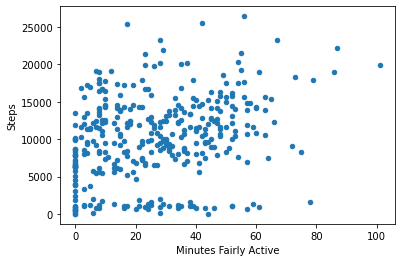

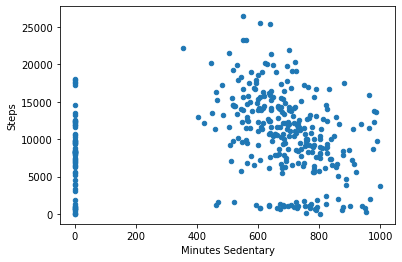

In [259]:
df= fitbit.groupby(['Minutes Lightly Active','Minutes Fairly Active','Minutes Sedentary'],as_index=False)['Steps'].median()
df
for col in df.columns[:-1]:
    df.plot(kind = 'scatter', x=col, y='Steps')


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [219]:
titanic = pd.read_csv('titanic.csv')
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
5,6,0.0,3,"Moran, Mr. James",male,23.926502,0,0,330877,8.4583,U0,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U0,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U0,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U0,C


#### Explore the titanic dataset using Pandas dtypes.

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [4]:
# NUMERICAL VARIABLES
titanic.select_dtypes(exclude=['object'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [5]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [45]:
plt.style.use('classic')


plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

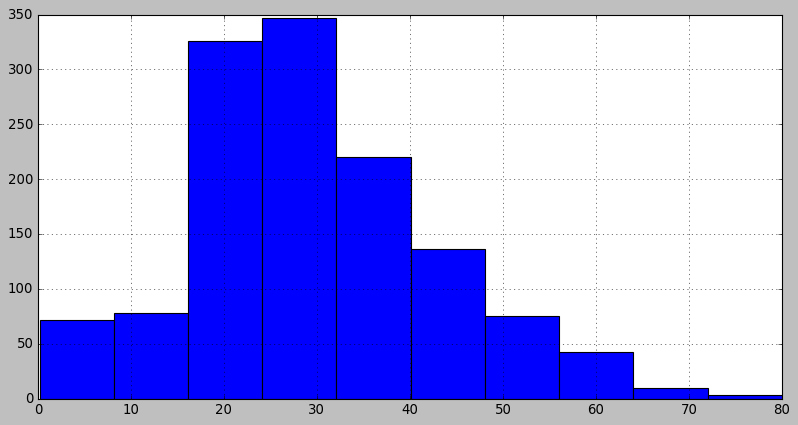

In [46]:
titanic['Age'].hist(figsize=(12,6))

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

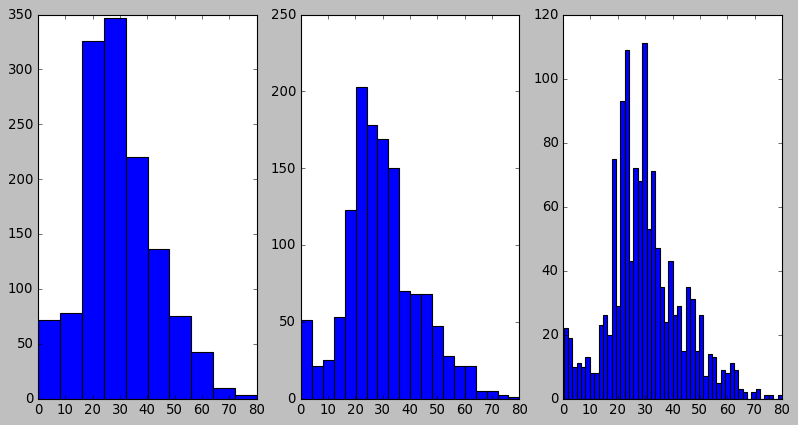

In [50]:
f,(a1,a2,a3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12,6))

a1.hist(titanic['Age'], bins=10)
a2.hist(titanic['Age'], bins=20)
a3.hist(titanic['Age'], bins=50)

plt.show()


#### How does the bin size affect your plot?

In [ ]:
"""
The bin width (and thus number of categories or ranges) affects the ability of a histogram to identify local regions of higher incidence. 
Too large, and you will not get enough differentiation. Too small, and the data cannot be grouped.
"""

#### Use seaborn to show the distribution of column `Age`.

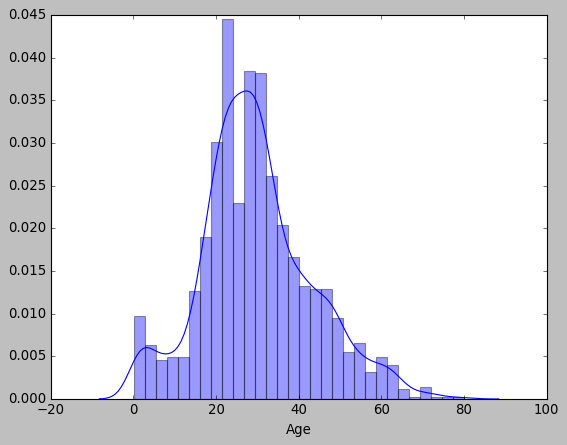

In [60]:
x= titanic['Age']
ax = sns.distplot(x)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

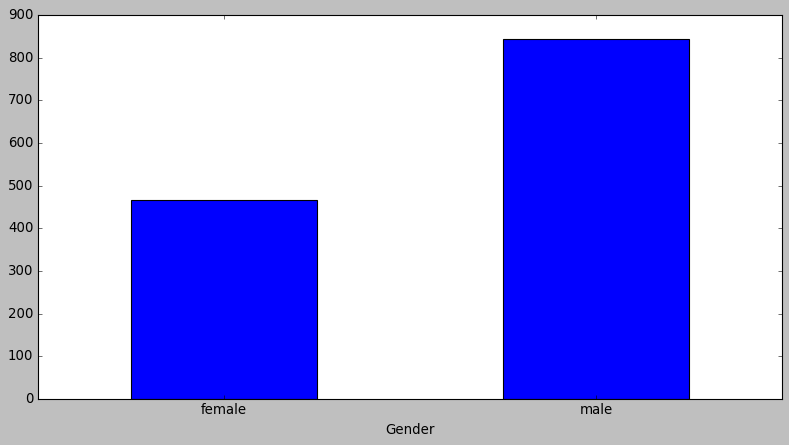

In [63]:
# Method 1 - matplotlib
gender= titanic.groupby('Gender')['Gender'].count()

gender.plot(kind = 'bar', figsize = (12,6))
plt.xticks(rotation='horizontal')
plt.show()


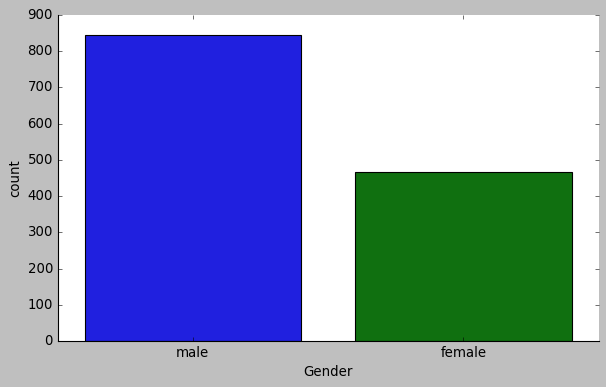

In [81]:
# Method 2 - seaborn
sns.catplot('Gender', data=titanic, kind='count', aspect=1.5)

#### Use the right plot to visualize the column `Pclass`.

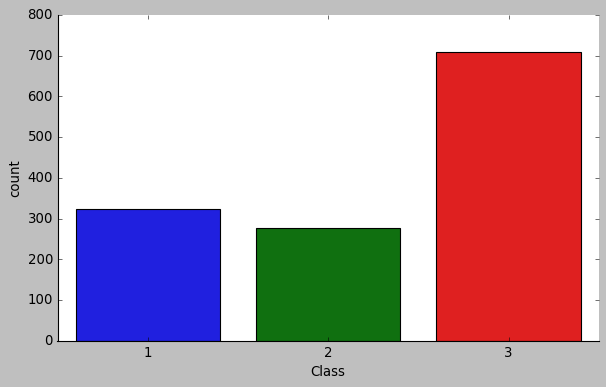

In [82]:
fig = sns.catplot('Pclass', data=titanic, kind='count', aspect=1.5)
fig.set_xlabels('Class')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

Text(0.5, 0, 'Age')

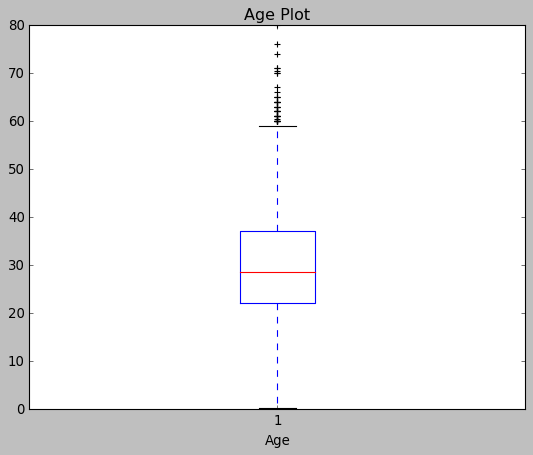

In [114]:
fig1, ax1 = plt.subplots()
ax1.set_title('Age Plot')
ax1.boxplot(titanic['Age'])

ax1.set_xlabel('Age')

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
The Age mean is somewhere near 30 years old.
The Interquartile range(25%-75%) is between 20 and 40 years olde
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

Text(0.65, 0.5, 'count    1309.000000\nmean       29.879186\nstd        13.448335\nmin         0.170000\n25%        22.000000\n50%        28.500000\n75%        37.000000\nmax        80.000000')

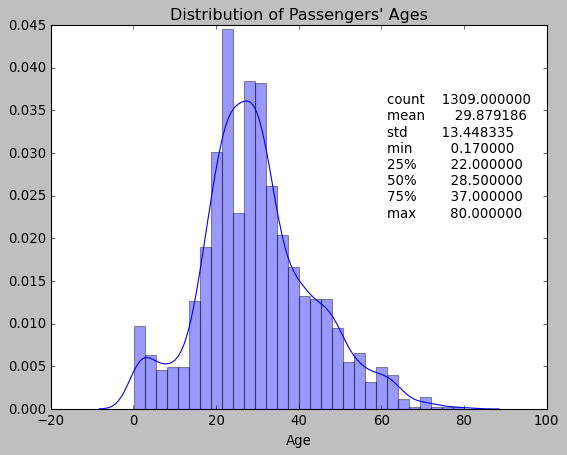

In [160]:
# Distribution of age, with an overlay of a density plot
age = titanic['Age']
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

plt.figtext(0.65,0.5, titanic['Age'].describe().to_string())


#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

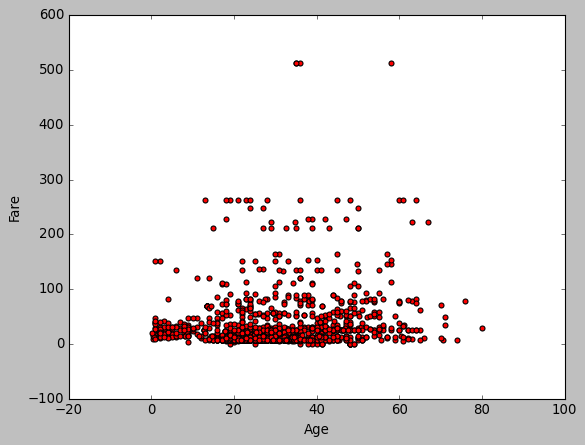

In [167]:
titanic.plot(kind='scatter' ,x='Age',y='Fare',color='red')


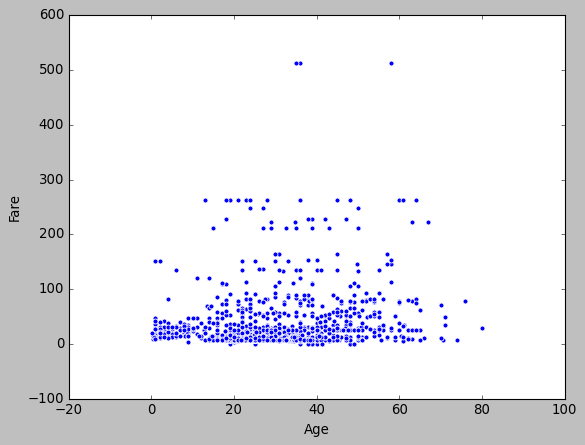

In [176]:
# Method 2 - seaborn
sns.scatterplot(data=titanic, x="Age", y="Fare")


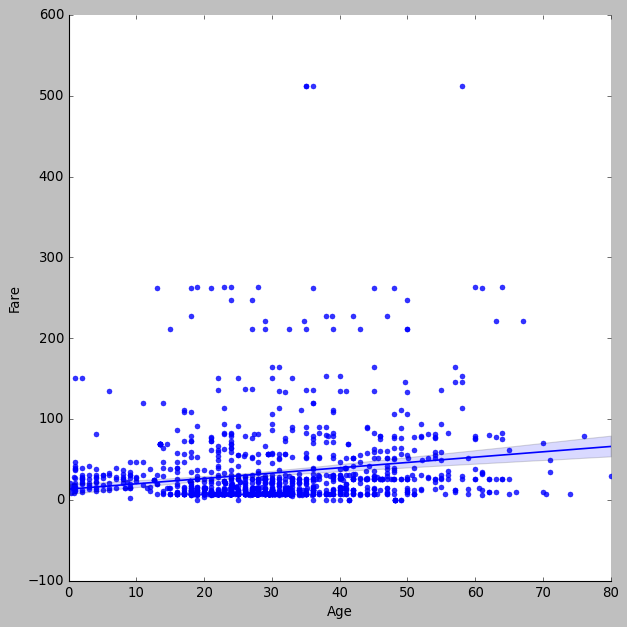

In [178]:
sns.lmplot(data=titanic, x="Age", y="Fare", height=8, aspect=1)

#### Plot the correlation matrix using seaborn.

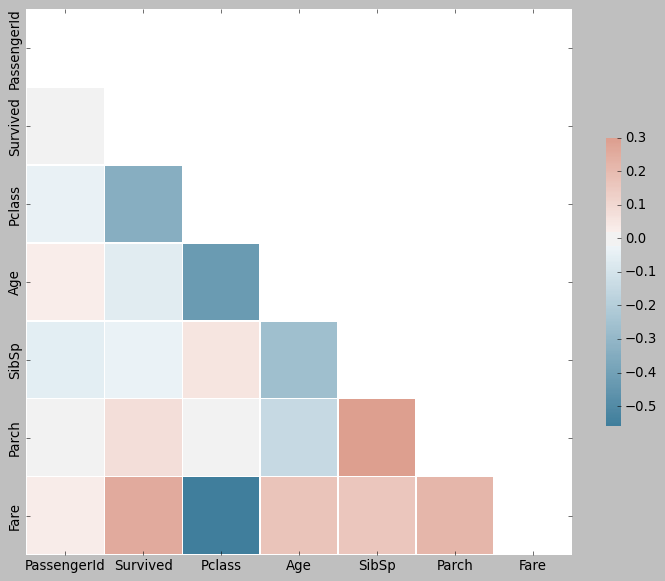

In [179]:

# Compute the correlation matrix
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### What are the most correlated features?

In [ ]:
"""
SibSp (Number of Siblings/Spouses Aboard) and Parch (Number of Parents/Children Aboard) 
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

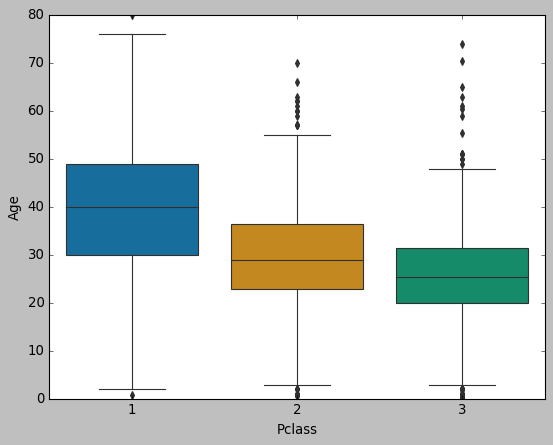

In [210]:
sns.boxplot(y='Age', x='Pclass', data=titanic, palette="colorblind")


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

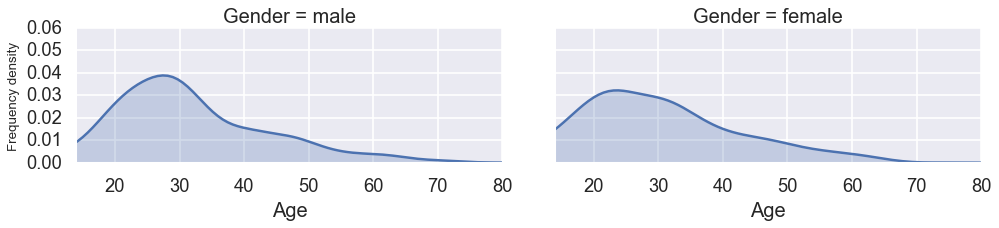

In [230]:
grid = sns.FacetGrid(titanic, col='Gender',height=3.2, aspect=2)
grid.map(sns.kdeplot, 'Age', shade=True)
grid.set(xlim=(14, titanic['Age'].max()), ylim=(0,0.06))
grid.set_ylabels('Frequency density', size=12)